In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline 

In [16]:
!pip install imbalanced-learn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**ref:**

https://towardsdatascience.com/support-vector-machine-mnist-digit-classification-with-python-including-my-hand-written-digits-83d6eca7004a

https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [3]:
#choose to run with colab, run the following code in advance
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [1]:
def get_detaset():
    train_df = pd.read_csv('classification-of-mnist-digits/train.csv')
    train = train_df.to_numpy()
    test_df = pd.read_csv('classification-of-mnist-digits/test.csv')
    test = test_df.to_numpy()
    train_result_df = pd.read_csv('classification-of-mnist-digits/train_result.csv')
    train_result = train_result_df.to_numpy()
    return train, test, train_result

def split_testset(data):
    data = np.delete(data, -1, axis=1)
    standardize_data = (data-np.mean(data, axis=1)[:,np.newaxis])/np.std(data, axis=1)[:,np.newaxis]
    return standardize_data

def treat_dataset(data, data_result):
    data = np.delete(data, -1, axis=1)
    #z-score standardization
    standardize_data = (data-np.mean(data, axis=1)[:,np.newaxis])/np.std(data, axis=1)[:,np.newaxis]
    data_result = np.delete(data_result, 0, axis=1)
    #indexes = np.arange(standardize_data.shape[0])
    #train_indexes = np.concatenate((indexes[indexes%5 == 0],indexes[indexes%5 == 1],indexes[indexes%5 == 2],indexes[indexes%5 == 3]),axis=0)
    #test_indexes = indexes[indexes%5==4]
    return standardize_data,data_result.flatten()

In [5]:
train, test, train_result = get_detaset()

In [6]:
test_data = split_testset(test)

In [7]:
X_treat, y_treat = treat_dataset(train, train_result)

(50000,)


<BarContainer object of 19 artists>

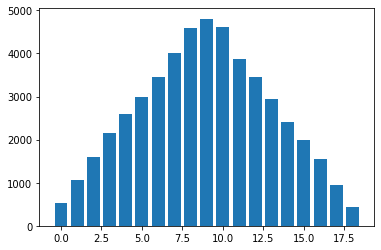

In [8]:
print(y_treat.shape)
y = Counter(y_treat)
plt.bar(y.keys(), y.values())

In [9]:
oversample = SMOTE()
# fit and apply the transform
X_treat_over, y_treat_over = oversample.fit_resample(X_treat, y_treat)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_treat_over,y_treat_over,test_size=0.2, random_state=30, stratify=y_treat_over)

(73066,)


<BarContainer object of 19 artists>

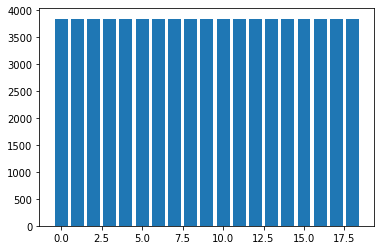

In [11]:
print(y_train.shape)
y = Counter(y_train)
plt.bar(y.keys(), y.values())

In [12]:
model = SVC(kernel="poly")
%time model.fit(X_train, y_train)

CPU times: user 52min 35s, sys: 5.19 s, total: 52min 41s
Wall time: 52min 29s


SVC(kernel='poly')

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

Text(69.0, 0.5, 'Truth')

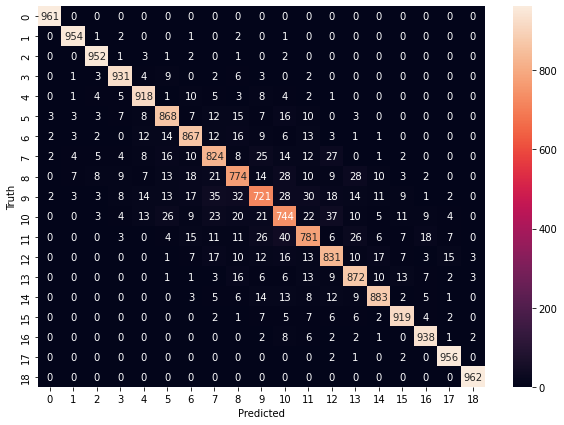

In [14]:
y_pred = model.predict(X_test)
SVM = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(SVM ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#SVM.score(X_test,y_test)

In [15]:
print(np.mean(y_pred == y_test))

0.9118081786828708


In [17]:
with open('SVM.pickle', 'wb') as f:
    pickle.dump(SVM, f)


In [18]:
with open('SVM.pickle', 'rb') as f:
    SVM = pickle.load(f)

In [20]:
pred = model.predict(test_data)
df_submit = pd.DataFrame(pred, columns = ['Class'])
# submission
df_submit=df_submit.reset_index()
df_submit.rename(columns = {'index':'Index'}, inplace = True)
df_submit.to_csv('./SVM.csv', index = False)

In [ ]:
y_pred

array([ 1, 14, 11, ..., 16,  0, 17])

In [ ]:
y_test

array([ 1, 14, 11, ..., 16,  0, 17])